# *Import Data*

# **Financial Service sector**

In [6]:
import pandas as pd
import numpy as np

# We are reading from the excel file to extract the financial data data that we are going to use later
df_x = pd.read_excel('executive_x.xlsx')
df_roa = pd.read_excel('new-roa.xlsx')

#editing the column name so that it would be easier for later use
df_x = df_x.rename(columns={'Ticker Symbol': 'Ticker'})
df_x = df_x.drop(columns = 'Company ID Number')
df_roa = df_roa.rename(columns={'Fiscal year end': 'Fiscal Year', 'Ticker Symbol': 'Ticker'})

#Showing the result of the final format that we have
df_x.head()

,Ticker,Fiscal Year,Company Name,Gender,ID number for each executive,Age,Total Current Compensation (Salary + Bonus)
0,AXP,2000,AMERICAN EXPRESS CO,MALE,108,NaN,4200.0
1,AXP,2000,AMERICAN EXPRESS CO,MALE,110,NaN,1330.0
2,AXP,2001,AMERICAN EXPRESS CO,MALE,110,NaN,1110.0
3,AXP,2000,AMERICAN EXPRESS CO,MALE,111,49.0,3580.0
4,AXP,2001,AMERICAN EXPRESS CO,MALE,111,50.0,3218.0


In [7]:
df_roa.head()

,Fiscal Year,Return on Assets,Ticker
0,2017,0.122422,KKR
1,2018,0.068206,KKR
2,2019,0.059057,KKR
3,2020,0.124954,KKR
4,2021,0.007865,KKR


In [8]:
#with above df_roa and df_x visualize and reformatted, we can now combine them into a new dataframe named df_fin
df_fin = df_x.merge(df_roa[['Fiscal Year', 'Ticker', 'Return on Assets']],
                  on=['Fiscal Year', 'Ticker'],
                  how='left')

#in this case, we still have to rename the "returns on assets" to "ROA" for easier use
df_fin.rename(columns={'Return on Assets': 'ROA'}, inplace=True)

df_fin['Industry'] = 'Financial Service'
df_fin.head()

,Ticker,Fiscal Year,Company Name,Gender,ID number for each executive,Age,Total Current Compensation (Salary + Bonus),ROA,Industry
0,AXP,2000,AMERICAN EXPRESS CO,MALE,108,NaN,4200.0,0.02387,Financial Service
1,AXP,2000,AMERICAN EXPRESS CO,MALE,110,NaN,1330.0,0.02387,Financial Service
2,AXP,2001,AMERICAN EXPRESS CO,MALE,110,NaN,1110.0,0.02345,Financial Service
3,AXP,2000,AMERICAN EXPRESS CO,MALE,111,49.0,3580.0,0.02387,Financial Service
4,AXP,2001,AMERICAN EXPRESS CO,MALE,111,50.0,3218.0,0.02345,Financial Service


# **Tech sector**

In [10]:
# We are reading from the excel file to extract the tech data data that we are going to use later

df1 = pd.read_excel("tech-roa.xlsx")
df2= pd.read_excel("tech-execu.xlsx")

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
#Here we are trying to select the Y value: ROA
df1=df1[['Ticker Symbol','Return on Assets','Fiscal year end']]
#Here we are trying to select the X value: executive ID, gender, age, and compensation
df2=df2[['Ticker Symbol (ticker)',
         'Fiscal Year (year)',
         'Company Name (coname)',
         'Gender (gender)',
         'ID number for each executive/company combination (co_per_rol)',
         "Executive\\'\\'s Age (age)",
         'Total Current Compensation (Salary + Bonus) (total_curr)']]
df1.head()

,Ticker Symbol,Return on Assets,Fiscal year end
0,ORCL,0.452978,2000
1,ORCL,0.431767,2001
2,ORCL,0.353606,2002
3,ORCL,0.368720,2003
4,ORCL,0.358719,2004


In [12]:
df2.head()

,Ticker Symbol (ticker),Fiscal Year (year),Company Name (coname),Gender (gender),ID number for each executive/company combination (co_per_rol),Executive\'\'s Age (age),Total Current Compensation (Salary + Bonus) (total_curr)
0,ADI,2000,ANALOG DEVICES INC,MALE,2668,66.0,913.077
1,AMD,2000,ADVANCED MICRO DEVICES,MALE,18717,NaN,1512.715
2,AMD,2001,ADVANCED MICRO DEVICES,MALE,18717,NaN,544.142
3,AMD,2002,ADVANCED MICRO DEVICES,MALE,18717,64.0,660.208
4,AMD,2003,ADVANCED MICRO DEVICES,MALE,18717,NaN,681.749


In [13]:
#Now we are doing a similar thing as we have done above which is renaming the columns
df1 = df1.rename(columns={'Ticker Symbol': 'Ticker',
                          'Fiscal year end': 'Fiscal Year',
                          })

df2 = df2.rename(columns={'Ticker Symbol (ticker)': 'Ticker',
                          'Fiscal Year (year)': 'Fiscal Year',
                          "Executive\\'\\'s Age (age)": "Age",
                         'Gender (gender)':'Gender',
                         'ID number for each executive/company combination (co_per_rol)':'ID number for each executive',
                         'Total Current Compensation (Salary + Bonus) (total_curr)':'Total Current Compensation (Salary + Bonus)'})

#with above df1 and df2 visualize and reformatted, we combined them and call it df_tech
df_tech = df2.merge(df1[['Fiscal Year', 'Ticker', 'Return on Assets']],
                  on=['Fiscal Year', 'Ticker'],
                  how='left')

#Afterward, we renamed the "returns on assets" to "ROA" and "Company Name (coname)" to "Company Name" for easier use
df_tech = df_tech.rename(columns={'Company Name (coname)': 'Company Name',
                                  'Return on Assets':'ROA'
                                })
df_tech['Industry']='Technology'
df_tech.head()

,Ticker,Fiscal Year,Company Name,Gender,ID number for each executive,Age,Total Current Compensation (Salary + Bonus),ROA,Industry
0,ADI,2000,ANALOG DEVICES INC,MALE,2668,66.0,913.077,0.278676,Technology
1,AMD,2000,ADVANCED MICRO DEVICES,MALE,18717,NaN,1512.715,0.151707,Technology
2,AMD,2001,ADVANCED MICRO DEVICES,MALE,18717,NaN,544.142,0.009257,Technology
3,AMD,2002,ADVANCED MICRO DEVICES,MALE,18717,64.0,660.208,0.073627,Technology
4,AMD,2003,ADVANCED MICRO DEVICES,MALE,18717,NaN,681.749,0.205219,Technology


# *Combined Data*

In [15]:
#After we have done all the feature selections, we can now combine all the datas to be used later on.
df_combined = pd.concat([df_fin, df_tech], ignore_index=True)

# *Data Cleaning*

# **Missing Value**

In [18]:
#Now we are starting to do some data cleaning after we combine the datasets
#first will be filtering out the NA values

df_combined.isna().sum()

Ticker                                            0
Fiscal Year                                       0
Company Name                                      0
Gender                                            0
ID number for each executive                      0
Age                                            1739
Total Current Compensation (Salary + Bonus)       0
ROA                                            1685
Industry                                          0
dtype: int64

In [19]:
#As we can see from above table, there is missing value for age which we will use the median to inpute the missing value.

df_combined['Age'] = df_combined['Age'].fillna(df_combined.groupby(['Ticker', 'Fiscal Year'])['Age'].transform('median'))
df_combined = df_combined.dropna()

#We should expect no NA values in the table generated
df_combined.isna().sum()

Ticker                                         0
Fiscal Year                                    0
Company Name                                   0
Gender                                         0
ID number for each executive                   0
Age                                            0
Total Current Compensation (Salary + Bonus)    0
ROA                                            0
Industry                                       0
dtype: int64

# **Gender encode**

In [21]:
#In the following code, we changed female into 1 and male into 0 and we are dealing with Non-numeric types
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender']

for col in categorical_columns:
    le = LabelEncoder()
    df_combined[col] = le.fit_transform(df_combined[col])

# **Outlier**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, '(d)ROA')

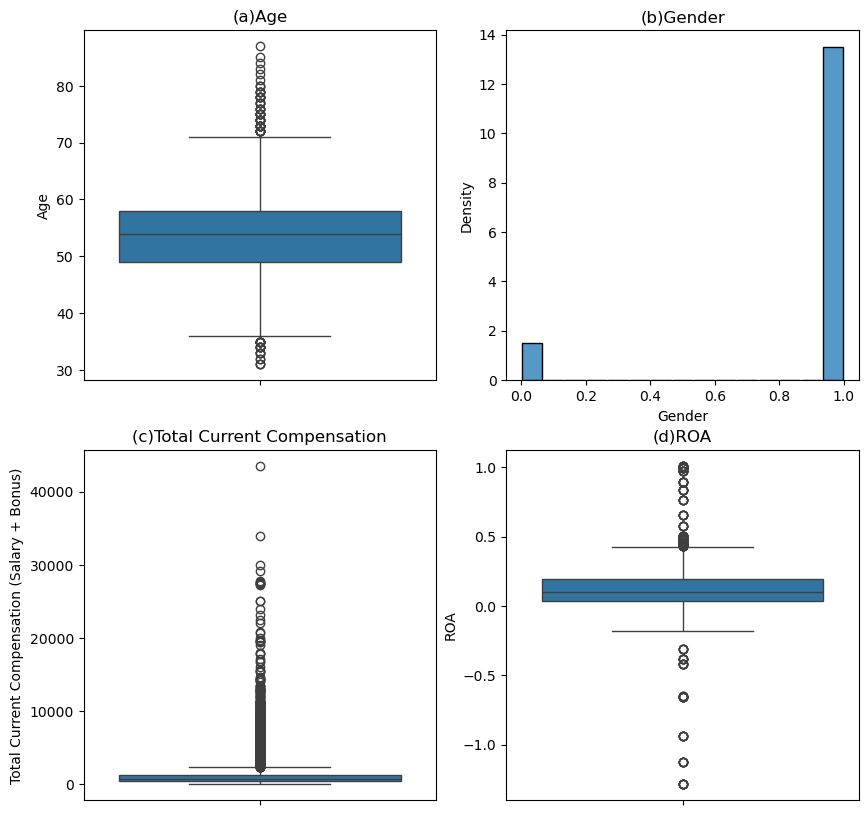

In [24]:
#Here, we will try to visualize the outliers presented in different graphs
fig,ax = plt.subplots(2, 2,figsize=(10,10))

#first will be a box plot with age values
sns.boxplot(df_combined['Age'],ax=ax[0,0])
ax[0,0].set_title('(a)Age')

#second one will be a histogram plot
sns.histplot(df_combined['Gender'],ax=ax[0,1],stat='density',shrink=0.9)
ax[0,1].set_title('(b)Gender')

#Third will be a box plot involving a total current compensation
sns.boxplot(df_combined['Total Current Compensation (Salary + Bonus)'],ax=ax[1,0])
ax[1,0].set_title('(c)Total Current Compensation')

#last one will be a box plot of ROA
sns.boxplot(df_combined['ROA'],ax=ax[1,1])
ax[1,1].set_title('(d)ROA')

1) Age- few outliers are present below 35 and above 70
2) Gender- majority of the sample is male (1), with a small number of females (0)
3) Total Current Compensation- Most data is tightly packed at the bottom, with a long tail of extreme outliers exceeding $30,000–$40,000.
4) ROA- many outliers, both positive and negative, with values exceeding 1 or below -1

In [26]:
df_combined['Total Current Compensation (Salary + Bonus)'].max()
max_compensation = df_combined['Total Current Compensation (Salary + Bonus)'].max()
company_name = df_combined.loc[df_combined['Total Current Compensation (Salary + Bonus)'] == max_compensation, 'Company Name']
print(company_name)

5459    APPLE INC
Name: Company Name, dtype: object


# **Age of the executive and compensation variance**

In [28]:
#Here we will try to find out the age range of the executive and see how different it would be
oldest = df_combined['Age'].max()
youngest = df_combined['Age'].min()

print(f'The oldest executive in history is: {oldest}')
print(f'The youngest executive in history is: {youngest}')

The oldest executive in history is: 87.0
The youngest executive in history is: 31.0


In [29]:
# We will now calculate the difference between age and compensation every year for each companies.
df_grouped = df_combined.groupby(['Ticker', 'Fiscal Year']).agg(
    age_var=('Age', 'var'),
    salary_var=('Total Current Compensation (Salary + Bonus)', 'var')
).reset_index()

#Then we combine them into a dataframe for better visualization
df_final = pd.merge(df_combined, df_grouped, on=['Ticker', 'Fiscal Year'], how='left')

# delete possible NA (for example, if a company only have one executive for a certain year, the result will be NA and we dont want that)
df_final = df_final.dropna()

#visualize the final data set
df_combine_final = df_final

In [30]:
df_combine_final.head()

,Ticker,Fiscal Year,Company Name,Gender,ID number for each executive,Age,Total Current Compensation (Salary + Bonus),ROA,Industry,age_var,salary_var
0,AXP,2000,AMERICAN EXPRESS CO,1,108,49.0,4200.0,0.02387,Financial Service,0.0,1.735778e+06
1,AXP,2000,AMERICAN EXPRESS CO,1,110,49.0,1330.0,0.02387,Financial Service,0.0,1.735778e+06
2,AXP,2001,AMERICAN EXPRESS CO,1,110,50.0,1110.0,0.02345,Financial Service,0.0,7.447007e+05
3,AXP,2000,AMERICAN EXPRESS CO,1,111,49.0,3580.0,0.02387,Financial Service,0.0,1.735778e+06
4,AXP,2001,AMERICAN EXPRESS CO,1,111,50.0,3218.0,0.02345,Financial Service,0.0,7.447007e+05


In [31]:
#Here is a better visualization for the combine dataset which includes a detail number for different variables.
df_des = df_combine_final.describe()
df_des

,Fiscal Year,Gender,ID number for each executive,Age,Total Current Compensation (Salary + Bonus),ROA,age_var,salary_var
count,8469.000000,8469.000000,8469.000000,8469.000000,8469.000000,8469.000000,8469.000000,8.469000e+03
mean,2011.871650,0.900697,37117.949935,53.669560,1519.498554,0.123474,31.598056,2.142264e+06
std,6.712898,0.299087,17839.886790,6.858742,2432.118881,0.141083,31.238236,1.218845e+07
min,2000.000000,0.000000,11.000000,31.000000,0.000000,-1.284950,0.000000,0.000000e+00
25%,2006.000000,1.000000,25053.000000,49.000000,500.000000,0.032373,10.083333,3.797426e+04
50%,2012.000000,1.000000,35936.000000,54.000000,729.167000,0.102071,24.952381,8.803464e+04
75%,2018.000000,1.000000,49106.000000,58.000000,1241.346000,0.191912,43.466667,6.182279e+05
max,2023.000000,1.000000,73287.000000,87.000000,43511.535000,1.008745,272.300000,3.069576e+08


# *Linearity testing*

In [33]:
from scipy.stats import pearsonr

# We break up the three variables and did it individually (Thats why we used a for loop)
for col in ['Gender', 'age_var', 'salary_var']:
    x = df_combine_final[col].to_numpy()
    y = df_combine_final['ROA'].to_numpy()

    corr, p_value = pearsonr(x, y)
    print(f"Pearson correlation between {col} and ROA: {corr:.3f}, p-value: {p_value:.3f}")


Pearson correlation between Gender and ROA: -0.033, p-value: 0.002
Pearson correlation between age_var and ROA: -0.059, p-value: 0.000
Pearson correlation between salary_var and ROA: -0.098, p-value: 0.000


In [34]:
#now we will separate the combine data into two separate, individual data frames of specific variable.
df_f = df_combine_final[df_combine_final['Industry'] == 'Financial Service']
df_t = df_combine_final[df_combine_final['Industry'] == 'Technology']

In [35]:
from scipy.stats import spearmanr

for col in ['Gender', 'age_var', 'salary_var']:
    corr, pval = spearmanr(df_f[col], df_f['ROA'])
    print(f"Spearman correlation between {col} and ROA: {round(corr, 3)}, p-value: {round(pval, 4)}")

for col in ['Gender', 'age_var', 'salary_var']:
    corr, pval = spearmanr(df_t[col], df_t['ROA'])
    print(f"Spearman correlation between {col} and ROA: {round(corr, 3)}, p-value: {round(pval, 4)}")


Spearman correlation between Gender and ROA: -0.016, p-value: 0.3463
Spearman correlation between age_var and ROA: -0.122, p-value: 0.0
Spearman correlation between salary_var and ROA: -0.16, p-value: 0.0
Spearman correlation between Gender and ROA: -0.009, p-value: 0.5207
Spearman correlation between age_var and ROA: 0.018, p-value: 0.2122
Spearman correlation between salary_var and ROA: 0.049, p-value: 0.0007


We can gain information from the above results (Pearson and Spearman correlation) that for df_f, financial sector, the age and salary sector shows a negative monotonic correlations with ROA and for technology sector, it shows a weak but significant positive monotonic trend with ROA. In both sectors, we can say that gender shows no meaningful monotonic correlation
We can also infer that the linearity is weak and limited since the pearson coefficient is relatively low. For the six results from spearman correlation, it shows that age and salary might follow a monotonic but not strictly linear relationship with ROA, especially in finance

# *decision tree*

In [38]:
# The first model that we will use will be the decision tree
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [39]:
# This part will be mainly on retrieving the X and Y value for later use.
# X1 and Y1 will be representing the Financial dataset
X1 = df_f[['Gender', 'age_var', 'salary_var']].to_numpy()
Y1 = df_f['ROA'].to_numpy()

# X2 and Y2 will be representing the Technology dataset
X2 = df_t[['Gender', 'age_var', 'salary_var']].to_numpy()
Y2 = df_t['ROA'].to_numpy()

In [40]:
# Now we will start to define the decision tree regression
# first we will start with spliting the data into training, validation and testing
def decision_tree_regression_with_validation(X, y, dataset_name):
    # We will have the training to be 60%, validation to be 20%, and testing to be 20%
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Next we will define the parameter grid for tuning purposes
    param_grid = {
        # max depth is set to 1 to 20 in order for us to test from different values
        'max_depth': range(1, 20),
        # minimum samples split is set so that we can have different visions
        'min_samples_split': [2, 5, 10],
    }

    # we will now try to use the grid search and cross validation to find the best parameter
    dt_reg = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Now with the best parameter found, we can print the statement for visualization of the result
    optimal_max_depth = grid_search.best_params_['max_depth']
    optimal_min_samples_split = grid_search.best_params_['min_samples_split']
    print(f"Optimal max_depth for {dataset_name}: {optimal_max_depth}")
    print(f"Optimal min_samples_split for {dataset_name}: {optimal_min_samples_split}")

    # now we will fit the final model based on the best parameter that we have found (based the traing and the validation)
    # first we will combine the training and validation set
    X_train_val = np.vstack((X_train, X_val))
    y_train_val = np.concatenate((y_train, y_val))
    dt_reg = DecisionTreeRegressor(
        max_depth=optimal_max_depth,
        min_samples_split=optimal_min_samples_split,
        random_state=42
    )
    dt_reg.fit(X_train_val, y_train_val)

    # Now we will evaluate the final model based on the testing set
    y_test_pred = dt_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    print(f"MSE on test set for {dataset_name}: {mse}")
    print(f"R² on test set for {dataset_name}: {r2}")
    print(f"MAE on test set for {dataset_name}: {mae}")

    # lastly we will add a code to visualize the feature importance
    feature_importances = dt_reg.feature_importances_
    features = ['Gender', 'age_var', 'salary_var']
    plt.bar(features, feature_importances)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Feature Importance ({dataset_name})')
    plt.show()

#Above will be the full code for defining the decision_tree_regression_with_validation

Optimal max_depth for df_f: 19
Optimal min_samples_split for df_f: 5
MSE on test set for df_f: 6.166115399103469e-05
R² on test set for df_f: 0.9978062455022357
MAE on test set for df_f: 0.0014465245432473712


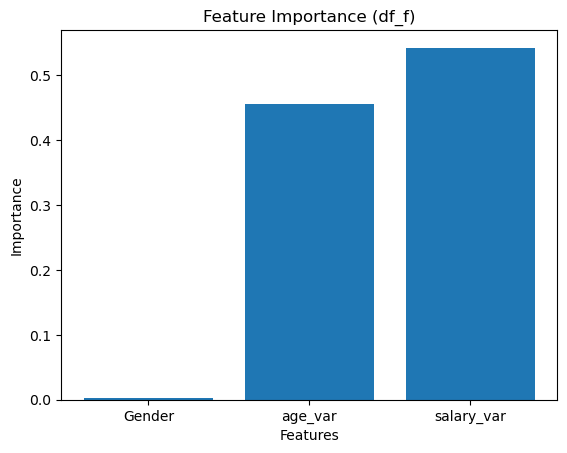

Optimal max_depth for df_t: 19
Optimal min_samples_split for df_t: 2
MSE on test set for df_t: 0.004644072392505758
R² on test set for df_t: 0.5920610960862174
MAE on test set for df_t: 0.039326069267085866


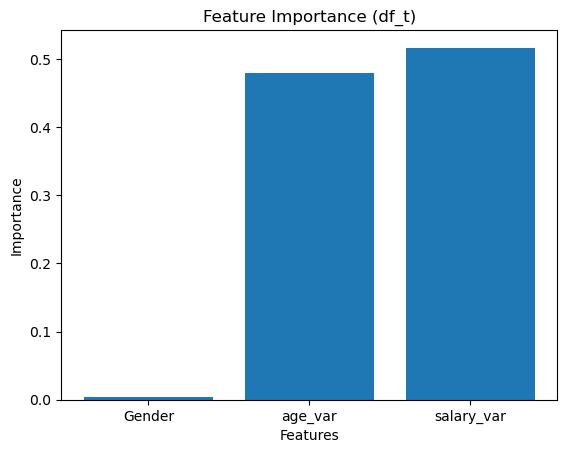

In [41]:
# With the definition done on above code, we can now use it to find the result
# first set will be for financial datas
decision_tree_regression_with_validation(X1, Y1, dataset_name='df_f')

# The it will be for technology datas
decision_tree_regression_with_validation(X2, Y2, dataset_name='df_t')

As shown above, the R^2 value of df_f is very close to 1 which represents that there is a high correlation between salary/age with ROA. The MSE and MAE value is very small, which in this case very influencial because it suggest that it is close to the actual value while the performance is very reliable. Therefore we can conclude that in the finance sector, factors like age and salary are highly effective at predicting outcomes, suggesting a more standardized and possibly conservative environment.

On the otherhand, the performance of df_t is not as effecient. with a moderate level for R^2, and a relatively low MAE, MSE value, we can say that the model that we have done for df_t is less percise and less reliable. There will be more stuff that is unexplain by the model. Therefore, factors like age, salary, and gender are not strong predictors for company outcomes in this domain. More complex or nuanced features may be needed.

So we can say that the df_f is way more fit comparing to the df_t since the R^2, MAE, MSE value are just on a moderate level.

# *Random Forest*

In [44]:
# The second model that we will use will be the random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data

#### The first step will be spliting the datas


In [47]:
# We will deal with financial sector first

In [48]:
# first step will be spliting the data into training and testing
X_train1_full, X_test1, y_train1_full, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Then we need to split the training data set into train and validation
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1_full, y_train1_full, test_size=0.25, random_state=42)
# Here the test size is 0.25 which by calculation 0.25 * 0.8 = 0.2
# basically it symbolize that the final testing set takes 20% of the whole data

print(f"Train size: {X_train1.shape}")
print(f"Validation size: {X_val1.shape}")
print(f"Test size: {X_test1.shape}")

Train size: (2172, 3)
Validation size: (724, 3)
Test size: (724, 3)


In [49]:
# Now we will deal with technology sector

In [50]:
# same thing from above, we will split the data into training and testing
X_train2_full, X_test2, y_train2_full, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=43)

# Then split training into training and validation
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2_full, y_train2_full, test_size=0.25, random_state=43)
# Again, testing set only takes 20% of the whole data

print(f"Train size: {X_train2.shape}")
print(f"Validation size: {X_val2.shape}")
print(f"Test size: {X_test2.shape}")

Train size: (2909, 3)
Validation size: (970, 3)
Test size: (970, 3)


# *financial sectors*

In [52]:
# The code will be complicated for visualization if we do financial and technology sectore together
# Therefore we started with financial sector and will move on to technology later

# This part we are defining the search range for hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Now we will initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Then we performed the hyperparameter search only on the training set
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train1, y_train1)

# We can get the best parameter based on the result from below
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# With the best parameter, we can train our new model that we initialized
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train1, y_train1)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=42)

In [53]:
# Now we will evaluate it on the validation set
y_val_pred = rf_best.predict(X_val1)
r2_val = r2_score(y_val1, y_val_pred)
mse_val = mean_squared_error(y_val1, y_val_pred)

print(f'Validation R² Score: {r2_val:.4f}')
print(f'Validation Mean Squared Error: {mse_val:.4f}')

Validation R² Score: 0.8294
Validation Mean Squared Error: 0.0040


In [54]:
# Lastly we will evaluate it on the testing set
y_test_pred = rf_best.predict(X_test1)
r2_test = r2_score(y_test1, y_test_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)
print(f'Test R² Score: {r2_test:.4f}')
print(f'Test Mean Squared Error: {mse_test:.4f}')

Test R² Score: 0.8913
Test Mean Squared Error: 0.0022


feature importance

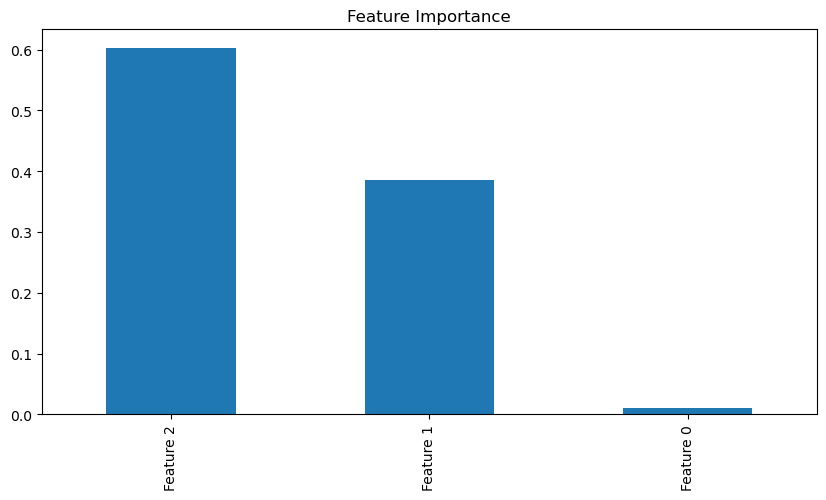

In [56]:
#Now we will find the feature importance and visualize it using a bar graph
# First will be setting the feature size
num_features = X_train1.shape[1]
# Then have it generates Feature 0, Feature 1, and all after
feature_names = [f"Feature {i}" for i in range(num_features)]

#generating the bar graph.
feature_importance = pd.Series(rf_best.feature_importances_, index=feature_names)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importance")
plt.show()

# *Technology Sectors*

In [58]:
#Now we will move on to the technology sector
#The step will be similar from above

# define the hyperparameter range which is the same as above
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# initialize the model
rf_model = RandomForestRegressor(random_state=43)

# perform hyperparameter search on training set
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train2, y_train2)

# Finding the best parameter to be used later
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# use the best parameter to train the new model we have
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train2, y_train2)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; 

RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=42)

In [59]:
# Same as above, we will now evaluate the model based on validation set
y_val_pred = rf_best.predict(X_val2)
r2_val = r2_score(y_val2, y_val_pred)
mse_val = mean_squared_error(y_val2, y_val_pred)

print(f'Validation R² Score: {r2_val:.4f}')
print(f'Validation Mean Squared Error: {mse_val:.4f}')

Validation R² Score: 0.8378
Validation Mean Squared Error: 0.0020


In [60]:
# Now with testing set
y_test_pred = rf_best.predict(X_test2)
r2_test = r2_score(y_test2, y_test_pred)
mse_test = mean_squared_error(y_test2, y_test_pred)

print(f'Test R² Score: {r2_test:.4f}')
print(f'Test Mean Squared Error: {mse_test:.4f}')

Test R² Score: 0.8873
Test Mean Squared Error: 0.0014


feature importance

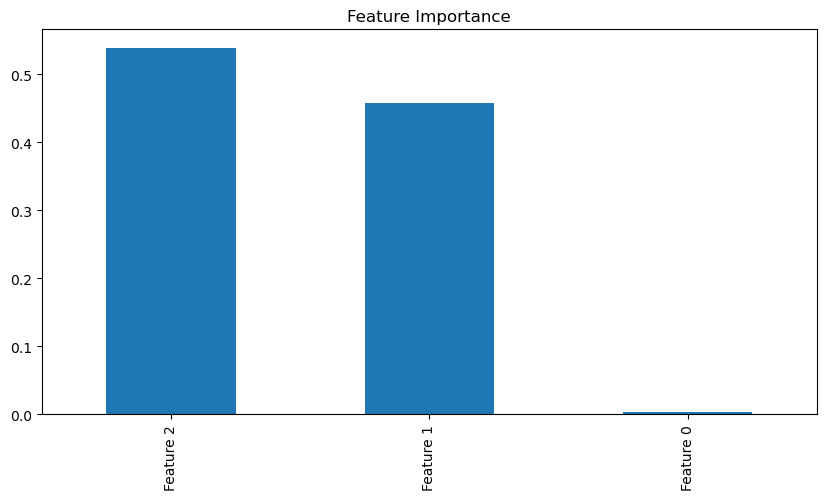

In [62]:
#The process of getting feature importance will be the same as above

num_features = X_train2.shape[1]
feature_names = [f"Feature {i}" for i in range(num_features)]

feature_importance = pd.Series(rf_best.feature_importances_, index=feature_names)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title("Feature Importance")
plt.show()

**what can this result present to us?**

As being shown by the result of two plots generated for financial sector and technology sector, we can say that the gender variable is not as imfluential in this data set and age/salary plays a more significant role. We can say that the seniority and compensation structures is more related to the company performance.

For financial sector (df_f), we can see that the result puts more weights on salary than age and compensation in finance is more tied to measurable output.

For technology sector (df_t), on the otherhand, we can see that the result weights more on age, which means that they rely more on seniority and leadership experience.

We can also suggest that current variables that we have is not enough to capture the whole diveristy's effect on company performance. More variables like educational background and ethnicity can be used to make the result more effective.

# *Random forest and decision comparison with SHAP value*

In [66]:
# In order to make sure the result is accurate, we will perform the Random Forest and Decision Tree again
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# **financial sector**

In [68]:
#These steps will be for Decision Tree model

# First we will start by training the Decision Tree
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train1, y_train1)

# Then we will evaluate based on validation set
y_val_pred_dt = dt.predict(X_val1)
mse_val_dt = mean_squared_error(y_val1, y_val_pred_dt)

# Lastly, we will evaluate it based on testing set
y_test_pred_dt = dt.predict(X_test1)
mse_test_dt = mean_squared_error(y_test1, y_test_pred_dt)

In [69]:
#These steps will be for Random Forest model

# First we train the Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train1, y_train1)

# Then we evaluate the random forest based on validation set
y_val_pred_rf = rf.predict(X_val1)
mse_val_rf = mean_squared_error(y_val1, y_val_pred_rf)

# Lastly we evaluate based on testing set
y_test_pred_rf = rf.predict(X_test1)
mse_test_rf = mean_squared_error(y_test1, y_test_pred_rf)

In [70]:
#We will now print out the MSE results for validation and testing result for dt and rf
print(f"Decision Tree Validation MSE: {mse_val_dt}")
print(f"Decision Tree Test MSE: {mse_test_dt}")
print(f"Random Forest Validation MSE: {mse_val_rf}")
print(f"Random Forest Test MSE: {mse_test_rf}")

Decision Tree Validation MSE: 0.010667547458653866
Decision Tree Test MSE: 0.00808339875724588
Random Forest Validation MSE: 0.002581581201983365
Random Forest Test MSE: 0.0016472858593282438


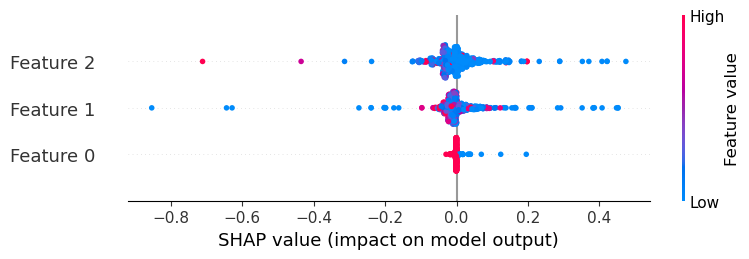

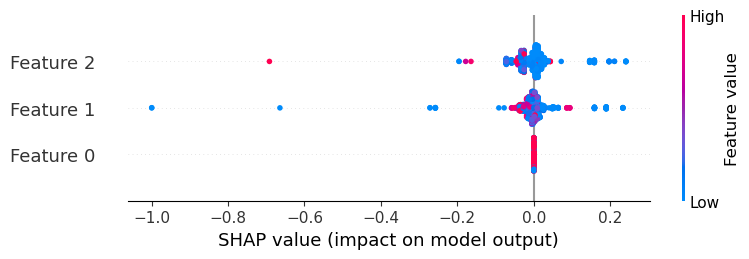

In [71]:
# Here, we will calculate the SHAP based one the validation set

#This part is based on random forest
explainer_rf = shap.Explainer(rf, X_train1)
shap_values_rf = explainer_rf(X_val1)

#This part is based on decision tree
explainer_dt = shap.Explainer(dt, X_train1)
shap_values_dt = explainer_dt(X_val1)

#We will show the SHAP Summary Plot for visualization
shap.summary_plot(shap_values_rf, X_val1, title="Random Forest SHAP Values on Validation Data")
shap.summary_plot(shap_values_dt, X_val1, title="Decision Tree SHAP Values on Validation Data")

# **tech sector**

In [73]:
# The process for technology sector will be the same as for financial sector.

# Training the Decision tree model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train2, y_train2)

# evaluate based on validation set
y_val_pred_dt = dt.predict(X_val2)
mse_val_dt = mean_squared_error(y_val2, y_val_pred_dt)

# evaluate based on testing set
y_test_pred_dt = dt.predict(X_test2)
mse_test_dt = mean_squared_error(y_test2, y_test_pred_dt)

In [74]:
# Now training the Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=43)
rf.fit(X_train2, y_train2)

# and evaluate based on validation set
y_val_pred_rf = rf.predict(X_val2)
mse_val_rf = mean_squared_error(y_val2, y_val_pred_rf)

# lastly, evaluate based on testing set
y_test_pred_rf = rf.predict(X_test2)
mse_test_rf = mean_squared_error(y_test2, y_test_pred_rf)

In [75]:
# Print out the MSE result
print(f"Decision Tree Validation MSE: {mse_val_dt}")
print(f"Decision Tree Test MSE: {mse_test_dt}")
print(f"Random Forest Validation MSE: {mse_val_rf}")
print(f"Random Forest Test MSE: {mse_test_rf}")

Decision Tree Validation MSE: 0.010663507824571775
Decision Tree Test MSE: 0.010278437641924251
Random Forest Validation MSE: 0.006595708888983883
Random Forest Test MSE: 0.006530169182374263


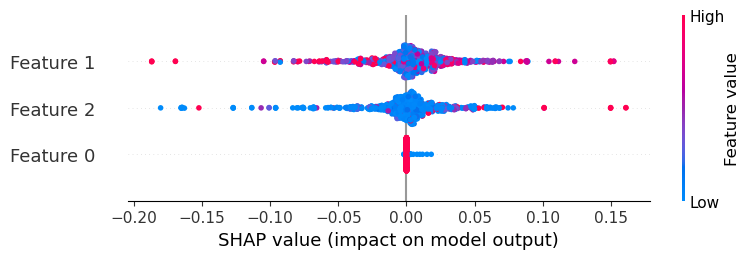

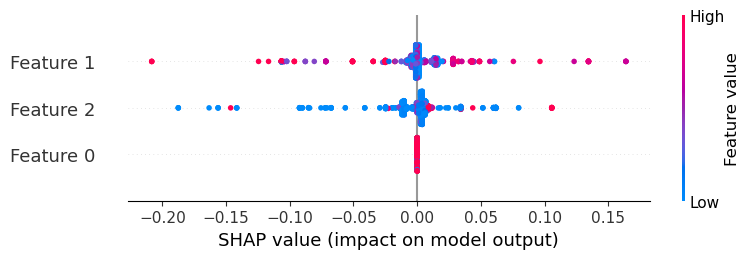

In [76]:
# Using validation set to calculate SHAP value

#For Random forest model
explainer_rf = shap.Explainer(rf, X_train2)
shap_values_rf = explainer_rf(X_val2)

#For Decision Tree model
explainer_dt = shap.Explainer(dt, X_train2)
shap_values_dt = explainer_dt(X_val2)

#And the SHAP Summary Plot for visualization
shap.summary_plot(shap_values_rf, X_val2, title="Random Forest SHAP Values on Validation Data")
shap.summary_plot(shap_values_dt, X_val2, title="Decision Tree SHAP Values on Validation Data")

**what can this result present to us?**

For above MSE results for both validation set and testing set from decision tree and random forest model, we can see that the results from random forest model performed better than decision tree since it has a lower value of MSE suggesting that it will make fewer large errors.

Looking at the SHAP figures, for finance sector, feature 2 (salary)  has a very high SHAP value, meaning that it plays a significant role, feature 1 (age) is less in feature value, but it is still important to have. Feature 0, which is gender, is very low meaning it is not as influential or plays very less role in this model

For technology sector, feature 1 has the highest SHAP value and plays a significant role and feature 2 is in the medium level which still plays a important role. For feature 0, it is similar to financial sector, it plays a less to no role to the result.

Again, it still suggest that we need more variables to be added to this data set to make the result more reliable.

# *standardlize X*

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
#Here, we are standardlizing X for financial sector
X_f = df_f[['Gender', 'age_var', 'salary_var']]
X_f_scaled = StandardScaler().fit_transform(X_f)

#and standardlizing X for technology sector
X_t = df_t[['Gender', 'age_var', 'salary_var']]
X_t_scaled = StandardScaler().fit_transform(X_t)

**ump**

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


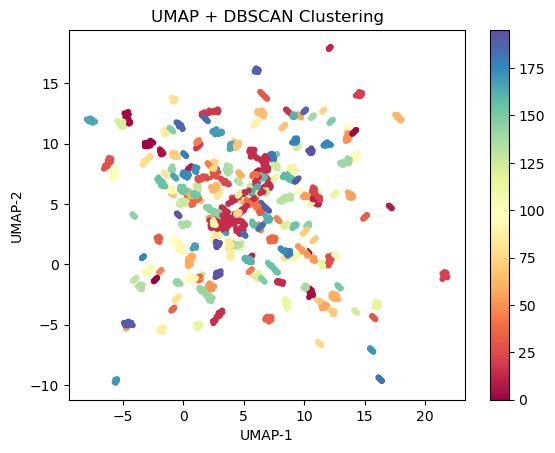

In [83]:
import umap.umap_ as umap

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
X_f = df_f[['Gender', 'age_var', 'salary_var']]
X_f_scaled = StandardScaler().fit_transform(X_f)


reducer = umap.UMAP(n_neighbors=15, min_dist=1.0, n_components=10, random_state=42)
X_umap = reducer.fit_transform(X_f_scaled)

dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X_umap)


plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='Spectral', s=10)
plt.title("UMAP + DBSCAN Clustering")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar()
plt.show()

The UMAP + DBSCAN clustering map from above shows a dense part in the middle which we concluded that it might be a noise cluster and it symbolize how many companies will have similar diversity profiles. Other than the dense part in the middle, the fact that there are no distinct color will symbolize that there are no clear categorical difference. It does also suggest that the diversity's impact on performance might be nonlinear.

In [85]:
from sklearn.metrics import silhouette_score
import numpy as np

# For later use, we will check the cluster label types
print("cluster label types:", np.unique(labels))

# Calculating the silhouette score at situation where there are at least two cluster and not all noise.
if len(set(labels)) > 1 and -1 in labels:
    mask = labels != -1 
    score = silhouette_score(X_umap[mask], labels[mask])
    print("Silhouette Score (excluding noise):", round(score, 3))
elif len(set(labels)) > 1:
    score = silhouette_score(X_umap, labels)
    print("Silhouette Score:", round(score, 3))
else:
    print("Unable to calculate Silhouette Score：Only one cluster or all are noise")

cluster label types: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195]
Silhouette Score: 0.829


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ New best score: 0.970 at eps=0.2, min_samples=3

 best combination:
eps = 0.2, min_samples = 3
silhouette score = 0.970


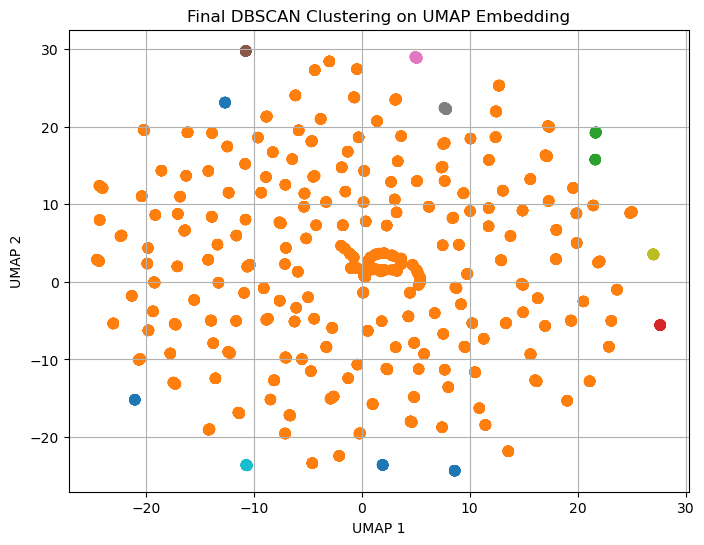

Number of samples per category：
Cluster
-1      63
 0    3369
 1      33
 2      22
 3      21
 4      32
 5      32
 6      26
 7      22
Name: count, dtype: int64
The mean of each feature：
           Gender     age_var    salary_var
Cluster                                    
-1       1.000000   65.247090  8.759096e+05
 0       0.888394   33.784700  3.970108e+06
 1       1.000000  149.636364  2.802606e+06
 2       1.000000    3.536364  1.022714e+06
 3       1.000000   36.897959  1.038836e+06
 4       1.000000    1.390625  1.284560e+07
 5       1.000000    0.169271  2.268113e+06
 6       1.000000   20.361538  5.312527e+04
 7       1.000000   51.454545  9.313302e+04


<Figure size 1000x600 with 0 Axes>

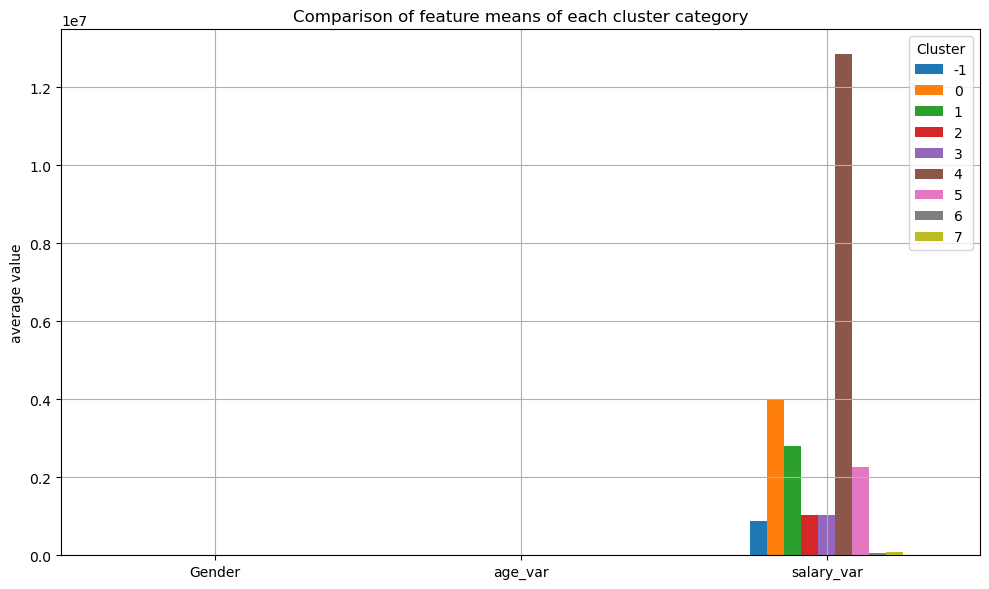

In [86]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import umap
import hdbscan
import numpy as np
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X_f_scaled)
best_score = -1
best_params = None

eps_range = np.arange(0.2, 2.0, 0.1)
min_samples_range = range(3, 15)

for eps in eps_range:
    for min_s in min_samples_range:
        db = DBSCAN(eps=eps, min_samples=min_s).fit(X_umap)
        labels = db.labels_

        if len(set(labels)) <= 1 or (len(set(labels)) == 2 and -1 in set(labels)):
            continue

        score = silhouette_score(X_umap, labels)

        if score > best_score:
            best_score = score
            best_params = (eps, min_s)
            print(f"✅ New best score: {score:.3f} at eps={eps}, min_samples={min_s}")

print("\n best combination:")
print(f"eps = {best_params[0]}, min_samples = {best_params[1]}")
print(f"silhouette score = {best_score:.3f}")
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

db_final = DBSCAN(eps=4, min_samples=20).fit(X_umap)
labels_final = db_final.labels_

# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_final, cmap='tab10', s=50)
plt.title("Final DBSCAN Clustering on UMAP Embedding")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame
df_f_clustered = X_f.copy()
df_f_clustered['Cluster'] = labels_final


cluster_counts = df_f_clustered['Cluster'].value_counts().sort_index()
print("Number of samples per category：")
print(cluster_counts)

cluster_means = df_f_clustered.groupby('Cluster').mean()
print("The mean of each feature：")
print(cluster_means)

# Visualization histogram: feature mean of different clusters
plt.figure(figsize=(10, 6))
cluster_means.T.plot(kind='bar', figsize=(10,6))
plt.title("Comparison of feature means of each cluster category")
plt.ylabel("average value")
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

We can see from above analysis that silhouette score is 0.970 which is very high meaning that there exist an excellent separation between clusters. In the above case, there is 8 cluster (0-7) with one noise (-1). There is only a few cluster that we should be aware of which is cluster 4, 0, 5. cluster 4 shows a dominant in salary and cluster 0 shows a dominant in population while cluster 5 symbolize a group of very young and mixed gender executive.
From above clustering, we can notice that workforce diversity is divides into distinct archetypes which can basically known for two types: A dominant, moderately paid, somewhat diverse mainstream group (cluster 0) and A highly compensated, homogenous, older elite group (cluster 4).
We can say that the effect of nonlinear dimensionality reduction cluster is not obvious therefore we will move on to the next model.

linear

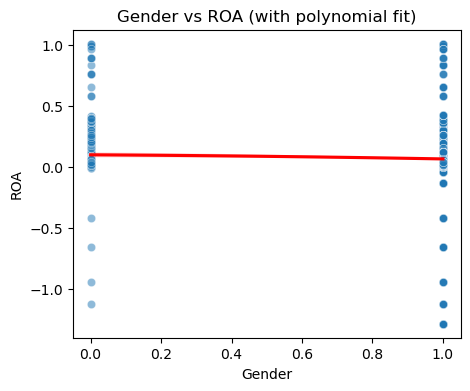

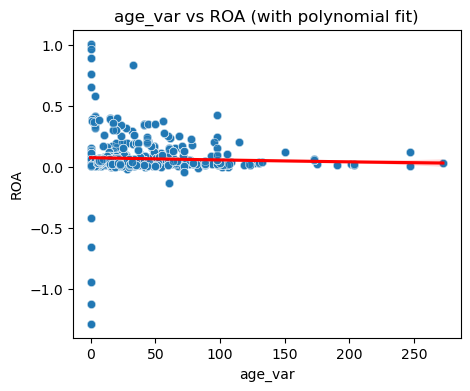

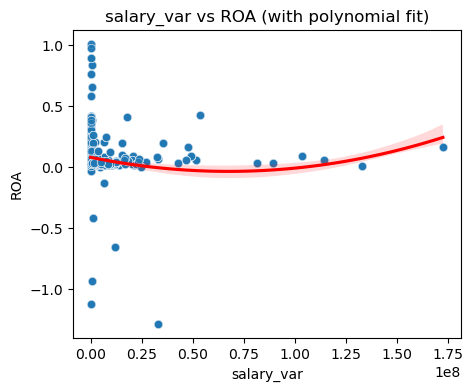

In [89]:
#Again, we want to test the linearity of the data set one more time to make sure our result will be accurate.
import seaborn as sns
import matplotlib.pyplot as plt

#There is too much warning coming out, therefore, I filter the warning to make it look better
import warnings
warnings.filterwarnings("ignore", category=np.RankWarning)

for col in ['Gender','age_var', 'salary_var']:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(data=df_f, x=col, y='ROA', alpha=0.5)
    sns.regplot(data=df_f, x=col, y='ROA', scatter=False, color='red', order=2)  # order=2 加二次曲线
    plt.title(f"{col} vs ROA (with polynomial fit)")
    plt.xlabel(col)
    plt.ylabel("ROA")
    plt.show()

From above three graphs, we can suggest that all of them will not be linear. Therefore we can move on to the next step.

NMF

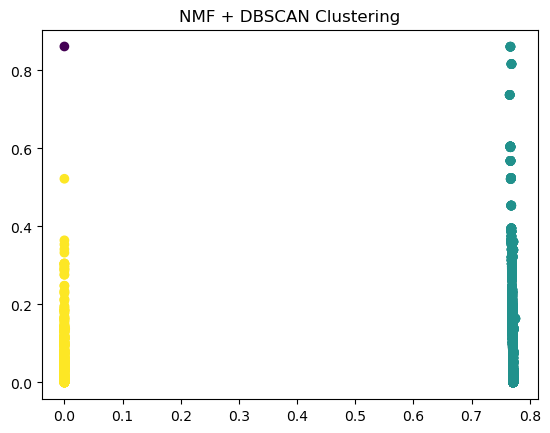

cluster types: [-1  0  1]
Silhouette Score (excluding noise): 0.861


In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

X_f = df_f[['Gender', 'age_var', 'salary_var']]
X_sf = MinMaxScaler().fit_transform(X_f)


nmf = NMF(n_components=2, init='random', random_state=0, max_iter=500)
X_nmf = nmf.fit_transform(X_sf)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_nmf)

if X_nmf.shape[1] == 2:
    plt.scatter(X_nmf[:, 0], X_nmf[:, 1], c=labels, cmap='viridis')
    plt.title("NMF + DBSCAN Clustering")
    plt.show()

print("cluster types:", np.unique(labels))

# Only calculate the silhouette if there are at least 2 clusters (and not all are noise)
if len(set(labels)) > 1 and -1 in labels:
    mask = labels != -1  # 排除噪声点
    score = silhouette_score(X_nmf[mask], labels[mask])
    print("Silhouette Score (excluding noise):", round(score, 3))
elif len(set(labels)) > 1:
    score = silhouette_score(X_nmf, labels)
    print("Silhouette Score:", round(score, 3))
else:
    print("Unable to calculate Silhouette Score：Too few clusters")

**what can this result present to us?**

As we see in the graph and the result from previous section, there are three kinds of clusters (-1,0,1). DBSCAN found two dense, well-separated groups (the noise in filter out). 
We can conclude that there is a clear pattern based the diversity trend which means that again we have seen an archetypes between the groups. We can also say that companies with higher diversity will have a higher performance.

Though result from NMF and dbscan are shown and usable, they are not performing too well. Therefore, we do want to try out more models to make sure our results are more reliable and useful, so we will use the Kmeans + DBSCAN next.

# *Financial Sector*

In [97]:
#First we will start with the financial sector
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#PCA dimensionality reduction (reduced to 2-dimensional)
pca = PCA(n_components=2)
X_pca_f = pca.fit_transform(X_f_scaled)


Best eps & min_samples for financial sector: (np.float64(0.8000000000000002), 6)

In [99]:
#We created a new db value with the eps and min_sample we have gain before and apply it to find the db_f from X_pca_f
db = DBSCAN(eps=0.8000000000000002,
            min_samples=6,
            metric='euclidean')
db_f = db.fit_predict(X_pca_f)

Silhouette Score (PCA + DBSCAN): 0.777


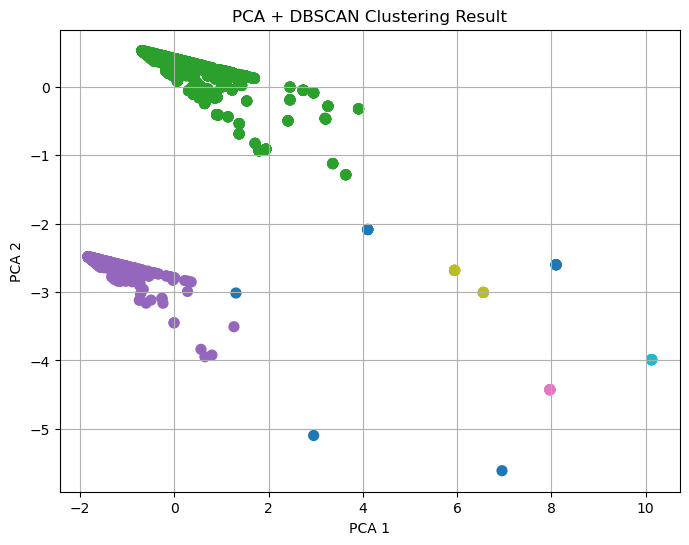

In [100]:
# DBSCAN
db = DBSCAN(eps=0.8000000000000002, min_samples=6)
labels_pca = db.fit_predict(X_pca_f)

# silhouette score
if len(set(labels_pca)) > 1 and not (len(set(labels_pca)) == 2 and -1 in set(labels_pca)):
    score = silhouette_score(X_pca_f, labels_pca)
    print(f"Silhouette Score (PCA + DBSCAN): {score:.3f}")
else:
    print("error")

#we can visualize the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_f[:, 0], X_pca_f[:, 1], c=labels_pca, cmap='tab10', s=50)
plt.title("PCA + DBSCAN Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [101]:
#Now with the DBSCAN result found, we can add it to the original data set df_f and we name it df_f
df_f['cluster'] = db_f

# Find the cluster mean for the variable 
summary = df_f.groupby('cluster')[['age_var', 'salary_var', 'Gender', 'ROA']].mean()

# We renamed the columns for it to be better to be used in the report and markdown tables
summary.columns = ['Avg Age Var', 'Avg Salary Var', 'Gender % (1=Male)', 'Avg ROA ']
summary.index.name = 'Cluster'

# Print a neat markdown table to be used in the report
print(summary.to_markdown())

|   Cluster |   Avg Age Var |   Avg Salary Var |   Gender % (1=Male) |   Avg ROA  |
|----------:|--------------:|-----------------:|--------------------:|-----------:|
|        -1 |      152.077  |      7.87481e+07 |            0.769231 | 0.029436   |
|         0 |       34.6397 |      2.84878e+06 |            1        | 0.0650833  |
|         1 |       25.6887 |      2.29869e+06 |            0        | 0.099405   |
|         2 |       19.7667 |      1.7268e+08  |            1        | 0.160218   |
|         3 |       95.1636 |      1.08313e+08 |            1        | 0.0735545  |
|         4 |      246.8    |      1.33041e+08 |            1        | 0.00786462 |


/var/folders/q9/dz3c_3gs7nn0085_6dk797tc0000gn/T/ipykernel_61547/3291848209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['cluster'] = db_f


In [102]:
#Here, we are getting the unique cluster labels and the counts of the clusters in the sample
unique_labels, counts = np.unique(db_f, return_counts=True)

# we loop through all the labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")

Cluster -1: 13 samples
Cluster 0: 3211 samples
Cluster 1: 373 samples
Cluster 2: 6 samples
Cluster 3: 11 samples
Cluster 4: 6 samples


For finance sector, we can see that there are 5 clusters with 1 noise and the silhouette score is 0.777 which symboize a good separation of the clusters. Cluster 0 has the largest sample but the result is very mediocre. We could set this as our core workforce but if we look at the other clusters, they will outperforming it. Cluster 1 suggest that young age, female personnel with high ROA will increase the performance of the company. Cluster two, with the highest ROA, has a tiny group but still can represent the top talent personnel. Cluster 3 is just moderate with relatively old personnel with high pay. Cluster 4 is a variance, therefore we excluded it. 
By above analyzation, we can come up with our result that the diversity does increase the performance of the company. However, the compensation (salary) will not work as effecient which means it doesn't guarantee higher performance. 

# *tech sector*

In [105]:
#Then we will continue with the technology sector
#The process is similar as financial sector

#PCA dimensionality reduction (reduced to 2-dimensional)
pca = PCA(n_components=2)
X_pca_t = pca.fit_transform(X_t_scaled)

Best eps & min_samples for tech sectore: (np.float64(0.8500000000000002), 5)

In [107]:
#We created a new db value with the eps and min_sample we have gain before and apply it to find the db_t from X_pca_t
db = DBSCAN(eps=0.8000000000000002,
            min_samples=5,
            metric='euclidean')
db_t = db.fit_predict(X_pca_t)

Silhouette Score (PCA + DBSCAN): 0.729


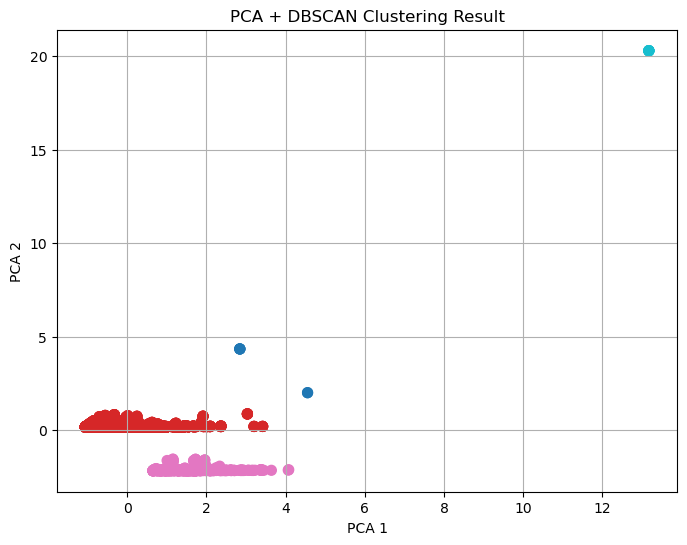

In [108]:
#DBSCAN
db = DBSCAN(eps=0.8500000000000002, min_samples=5)
labels_pca = db.fit_predict(X_pca_t)

#silhouette score
if len(set(labels_pca)) > 1 and not (len(set(labels_pca)) == 2 and -1 in set(labels_pca)):
    score = silhouette_score(X_pca_t, labels_pca)
    print(f"Silhouette Score (PCA + DBSCAN): {score:.3f}")
else:
    print("error")

#we can visualize the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_t[:, 0], X_pca_t[:, 1], c=labels_pca, cmap='tab10', s=50)
plt.title("PCA + DBSCAN Clustering Result")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [109]:
#Now with the DBSCAN result found, we can add it to the original data set df_f and we name it df_f
df_t['cluster'] = db_t  # db_f 是你聚类后的标签

# Find the cluster mean for the variable 
summary = df_t.groupby('cluster')[['age_var', 'salary_var', 'Gender', 'ROA']].mean()

# We renamed the columns for it to be better to be used in the report and markdown tables
summary.columns = ['Avg Age Var', 'Avg Salary Var', 'Gender % (1=Male)', 'Avg ROA']
summary.index.name = 'Cluster'

# Print a neat markdown table to be used in the report
print(summary.to_markdown())

|   Cluster |   Avg Age Var |   Avg Salary Var |   Gender % (1=Male) |    Avg ROA |
|----------:|--------------:|-----------------:|--------------------:|-----------:|
|        -1 |       40.2667 |      6.35825e+07 |            0.666667 |  0.0438152 |
|         0 |       28.8144 | 357215           |            1        |  0.164332  |
|         1 |       30.0151 | 531668           |            0        |  0.169556  |
|         2 |       36.9667 |      3.06958e+08 |            1        | -0.0360262 |
|         3 |      139.838  |      3.896e+06   |            1        |  0.170785  |


/var/folders/q9/dz3c_3gs7nn0085_6dk797tc0000gn/T/ipykernel_61547/1284129892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['cluster'] = db_t  # db_f 是你聚类后的标签


In [110]:
#Here, we are getting the unique cluster labels and the counts of the clusters in the sample
unique_labels, counts = np.unique(db_t, return_counts=True)

# we loop through all the labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")

Cluster -1: 6 samples
Cluster 0: 4358 samples
Cluster 1: 463 samples
Cluster 2: 6 samples
Cluster 3: 16 samples


For technology sector, we can see that there are 4 clusters with 1 noise and the silhouette score is 0.729 which still symboize a good separation of the clusters, even though it is a little less than financial sector. 
Cluster 0 still have the largest sample but now we see that it has the second highest ROA and low salary (high ROI). Therefore We could set this as our core workforce. Cluster 1 has the highest ROA suggest that gender diversity (female only) will link to high ROA and therefore will increase the performance of the company. Cluster 2, just like financial sector, only have 6 sample and with a negative return will mean that they are overpaid underperforming elite group. Cluster 3 is also high in ROA but the average age is not a prefer in this case. 
By above analyzation, we can come up with our result that the diversity also increase the performance of the company in this sector. IN our case here, cluster 1 with all female age around 30 outperformed other clusters. On the otherhand, cluster 0 with young and all-male teams also perform well. Cluster 0 and cluster 1 achieved to have low Compensation but a high Performance, but cluster 2 and 3 show a high compensation does not equal to a higher performance. Therefore, we can say that we need a moderate team.